Mesma coisa que o arquivo EDA-Gorjetas, porém, importando um aquivo .csv atualizado, com muito mais registros

# Importando base de dados

In [2]:
import pandas as pd  # importando o Pandas
df = pd.read_csv('tips_atualizado.csv')  # criando o dataframe inicial a partir do arquivo tips.csv
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução dos campos e colunas

## Tradução das colunas

In [3]:
df.columns  # retorna os nomes das colunas do DF

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
renomear = { 
    'total_bill': 'conta_total',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'horário',
    'size': 'pessoas_na_mesa'
}  # dicionário com os nomes das colunas e suas traduções:
dft = df.rename(columns=renomear)  # renomeando as colunas de acordo com a variável acima
dft

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


## Tradução dos campos

In [5]:
dft.horário.unique()  # verificando os valores únicos na coluna 'horário'

array(['Dinner', 'Lunch'], dtype=object)

In [6]:
# colunas 'sobremesa', 'dia_da_semana' e 'horário':
dft['sobremesa'] = dft['sobremesa'].map({'No': 'Não', 'Yes': 'Sim'})
dft['dia_da_semana'] = dft['dia_da_semana'].map({'Sun': 'Domingo', 
                                                 'Sat': 'Sábado',
                                                 'Thur': 'Quinta',
                                                 'Fri': 'Sexta',})
dft['horário'] = dft['horário'].map({'Dinner': 'Jantar', 'Lunch': 'Almoço'})
dft

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.990000,1.010000,Não,Domingo,Jantar,2
1,10.340000,1.660000,Não,Domingo,Jantar,3
2,21.010000,3.500000,Não,Domingo,Jantar,3
3,23.680000,3.310000,Não,Domingo,Jantar,2
4,24.590000,3.610000,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3
3412,25.531567,1.604021,Sim,Sábado,Jantar,2
3413,21.547132,1.733914,Sim,Sábado,Jantar,2
3414,18.966233,1.718951,Não,Sábado,Jantar,2


# Iniciando com Seaborn

In [7]:
# importando:
import seaborn as sns  
# verificando qual a versão:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\luigy\anaconda3\lib\site-packages
Requires: numpy, scipy, pandas, matplotlib
Required-by: 


# Análise 1: valor da conta e gorjeta

#### Relembrando colunas:

In [8]:
dft.head()

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Plotando gráfico de dispersão

<AxesSubplot:xlabel='conta_total', ylabel='gorjeta'>

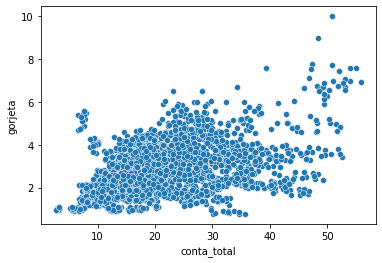

In [9]:
sns.scatterplot(x='conta_total', y='gorjeta', data=dft)

In [10]:
#mostrando o tamanho do DF (linhas/colunas):
dft.shape

(3416, 6)

## Criando o campo porcentagem

In [11]:
# relembrando como está o DF
dft.head()

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [12]:
dft['porcentagem'] = (dft['gorjeta'] / dft['conta_total']).round(2)
dft

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.990000,1.010000,Não,Domingo,Jantar,2,0.06
1,10.340000,1.660000,Não,Domingo,Jantar,3,0.16
2,21.010000,3.500000,Não,Domingo,Jantar,3,0.17
3,23.680000,3.310000,Não,Domingo,Jantar,2,0.14
4,24.590000,3.610000,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3,0.18
3412,25.531567,1.604021,Sim,Sábado,Jantar,2,0.06
3413,21.547132,1.733914,Sim,Sábado,Jantar,2,0.08
3414,18.966233,1.718951,Não,Sábado,Jantar,2,0.09


<AxesSubplot:xlabel='conta_total', ylabel='porcentagem'>

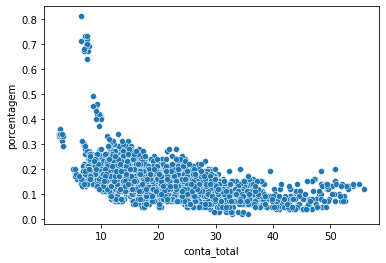

In [13]:
# scatterplot agora com o campo novo 'porcentagem'
sns.scatterplot(x='conta_total', y='porcentagem', data=dft)

## Plotando gráfico linha (relplot)

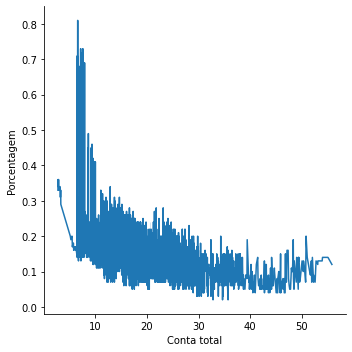

In [14]:
teste_rel = sns.relplot(x='conta_total', y='porcentagem', data=dft, kind='line')
teste_rel.set(xlabel='Conta total', ylabel='Porcentagem')  # renomeando as labels

# Análise 2: sobremesa

## Análise descritiva:

Analisando se o valor da gorjeta está ligado ao fato de ter sobremesa ou não

In [15]:
dft.head()  # relembrando

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [16]:
dft.describe()

,conta_total,gorjeta,pessoas_na_mesa,porcentagem
count,3416.000000,3416.000000,3416.000000,3416.000000
mean,19.824368,2.711189,2.569672,0.151326
std,8.984716,1.078789,0.949288,0.065032
min,2.799644,0.766203,1.000000,0.020000
25%,13.388590,1.919737,2.000000,0.110000
50%,17.800015,2.549192,2.000000,0.150000
75%,24.331401,3.292833,3.000000,0.180000
max,55.804318,10.000000,6.000000,0.810000


In [18]:
dft[dft['sobremesa'] == 'Sim'].describe()

,conta_total,gorjeta,pessoas_na_mesa,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [19]:
dft[dft['sobremesa'] == 'Não'].describe()

,conta_total,gorjeta,pessoas_na_mesa,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


## Análise visual:

Analisando com gráficos se o valor da gorjeta está ligado ao fato de ter sobremesa ou não

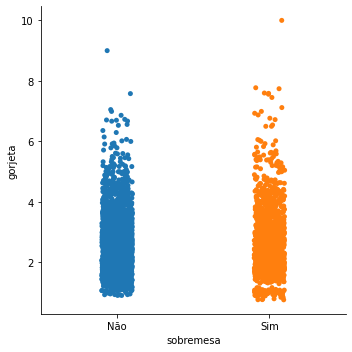

In [20]:
sns.catplot(x='sobremesa', y='gorjeta', data=dft)

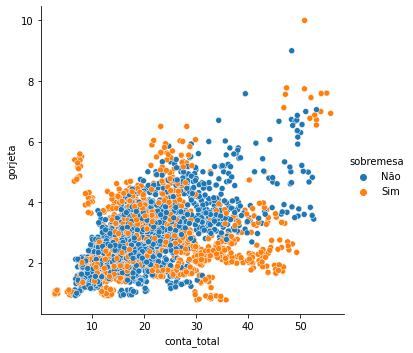

In [21]:
sns.relplot(x='conta_total', y='gorjeta', hue='sobremesa', data=dft)

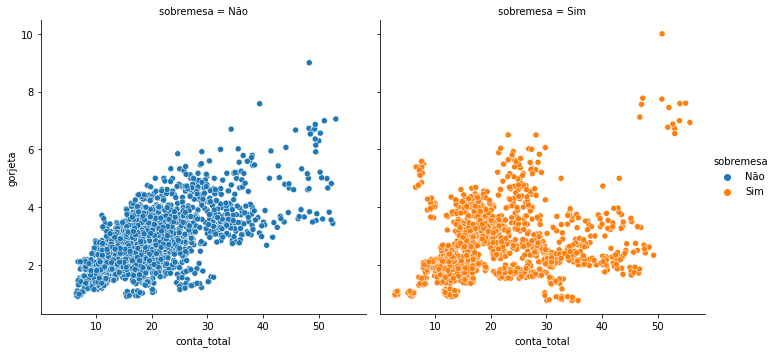

In [22]:
sns.relplot(x='conta_total', y='gorjeta', hue='sobremesa', col='sobremesa', data=dft)

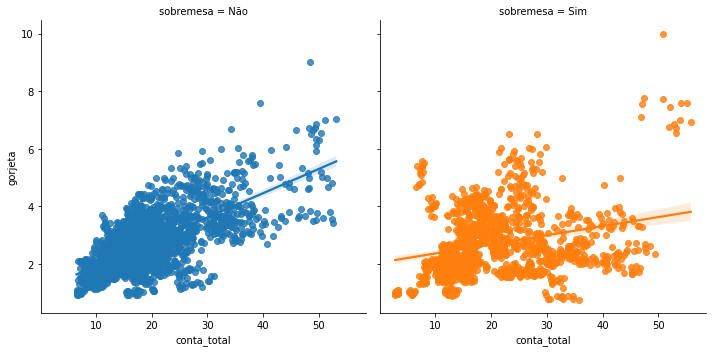

In [23]:
sns.lmplot(x='conta_total', y='gorjeta', col='sobremesa', hue='sobremesa', data=dft)

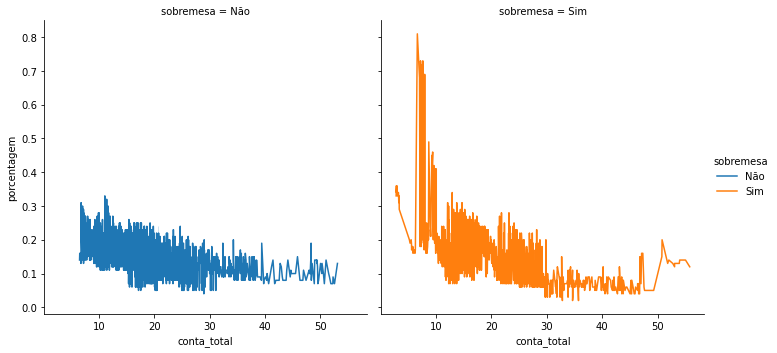

In [24]:
sns.relplot(x='conta_total', y='porcentagem', hue='sobremesa', kind='line', col='sobremesa', data=dft)

## Teste de hipótese

Analisando com o ranksums se o valor da gorjeta está ligado ao fato de ter sobremesa ou não

Hipótese null: A distribuição da taxa da gorjeta é a mesma nos dois grupos

Hipótese alt: A distribuição da taxa da gorjeta NÃO é a mesma nos dois grupos

In [28]:
# importando o ranksums (estatística)
from scipy.stats import ranksums

In [29]:
# query que retorna a coluna porcentagem, mas apenas se "sobremesa == 'Sim'"
sobremesa = dft.query("sobremesa == 'Sim'").porcentagem
sobremesa

56      0.08
58      0.16
60      0.16
61      0.14
62      0.18
        ... 
3406    0.18
3408    0.09
3409    0.03
3412    0.06
3413    0.08
Name: porcentagem, Length: 1302, dtype: float64

In [30]:
# query que retorna a coluna porcentagem, mas apenas se "sobremesa == 'Não'"
sem_sobremesa = dft.query("sobremesa == 'Não'")['porcentagem']
sem_sobremesa

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3407    0.12
3410    0.09
3411    0.18
3414    0.09
3415    0.16
Name: porcentagem, Length: 2114, dtype: float64

In [31]:
rs_sobremesa = ranksums(sobremesa, sem_sobremesa)[1]
print(f'O pvalue é {rs_sobremesa}')

O pvalue é 0.033144013617673405


pvalue = 0,03, o que significa que pvalue < 0,05, ou seja, podemos SIM aceitar a H alt

# Análise 3: dias da semana

In [126]:
dft.head()  #relembrando

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Análise visual

Analisando com gráficos se o valor da gorjeta está ligado ao dia da semana

In [32]:
dft.dia_da_semana.unique()
#mostrando os valores únicos na coluna dia_da_semana^

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

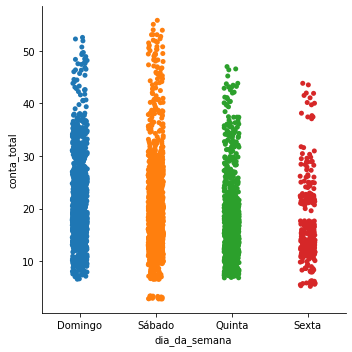

In [33]:
sns.catplot(x='dia_da_semana', y='conta_total', data=dft)

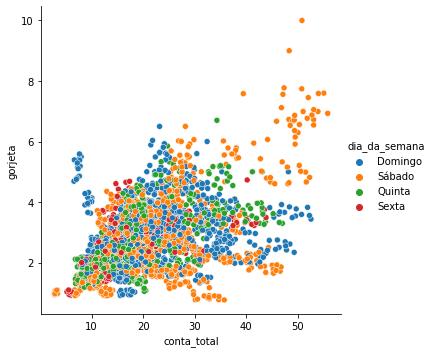

In [34]:
sns.relplot(x='conta_total', y='gorjeta', hue='dia_da_semana', data=dft)

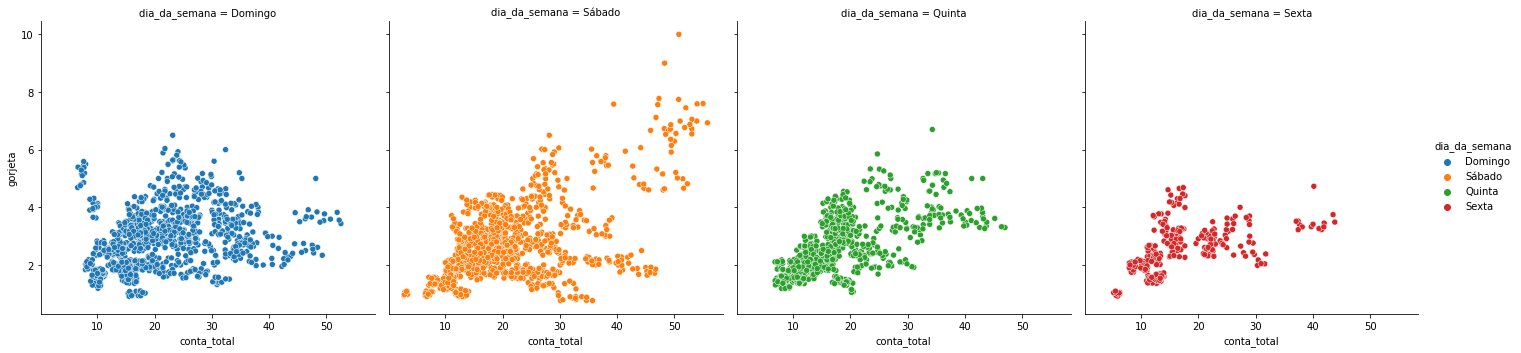

In [35]:
sns.relplot(x='conta_total', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=dft)

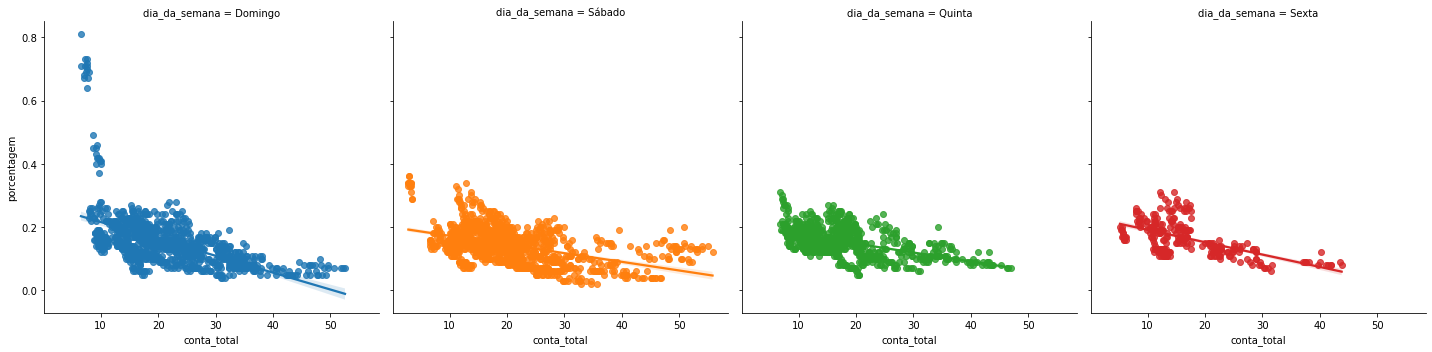

In [36]:
sns.lmplot(x='conta_total', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=dft)

Podemos ver que, quanto maior o valor da conta, menor a porcentagem da gorjeta

## Análise descritiva:

Analisando se o valor da gorjeta está ligado ao dia da semana

In [37]:
media_geral_gorjetas = dft.gorjeta.mean()
print(f'A média geral das gorjetas é de {media_geral_gorjetas:.3f}')

A média geral das gorjetas é de 2.711


In [39]:
#mostrando a média de cada dia da semana:
dft.groupby('dia_da_semana').mean().round(2)[['conta_total', 'gorjeta', 'porcentagem']]

,conta_total,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.44,2.90,0.15
Quinta,17.72,2.56,0.15
Sexta,17.22,2.55,0.16
Sábado,20.48,2.69,0.14


In [40]:
#mostrando a frequência de cada dia:
print('Frequência dos dias:')
dft.dia_da_semana.value_counts()

Frequência dos dias:


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

## Teste de hipótese

Analisando com o ranksums se o valor da gorjeta está ligado ao dia da semana

hipótese nula: a distribuição do valor da conta é igual no sábado e no domingo

hipótese alt: a distribuição do valor da conta NÃO é igual no sábado e no domingo

In [41]:
# query que retorna a coluna 'conta_total', mas apenas se "dia_da_semana == 'Domingo'"
conta_domingo = dft.query("dia_da_semana == 'Domingo'").conta_total
conta_domingo

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3358    21.989267
3359    32.406667
3360    18.516067
3361    21.521342
3362    14.232724
Name: conta_total, Length: 1064, dtype: float64

In [42]:
# query que retorna a coluna 'conta_total', mas apenas se "dia_da_semana == 'Sábado'"
conta_sabado = dft.query("dia_da_semana == 'Sábado'").conta_total
conta_sabado

19      20.650000
20      17.920000
21      20.290000
22      15.770000
23      39.420000
          ...    
3410    38.663518
3411    26.330845
3412    25.531567
3413    21.547132
3414    18.966233
Name: conta_total, Length: 1218, dtype: float64

In [43]:
rs_dia_da_semana = ranksums(conta_sabado, conta_domingo)[1]
print(f'O pvalue é {rs_dia_da_semana}')

O pvalue é 0.0004435935681441821


pvalue = 0,0004, o que significa que pvalue < 0,05, ou seja, podemos SIM aceitar a H alt

# Análise 4: horário 

Analisando a hora do dia, se tem diferença quando é jantar ou almoço em relação à gorjeta.

## Análise descritiva e visual

In [44]:
#relembrando
dft.head()

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [45]:
dft['horário'].unique()  # mostra os dados únicos da coluna 'horario'

array(['Jantar', 'Almoço'], dtype=object)

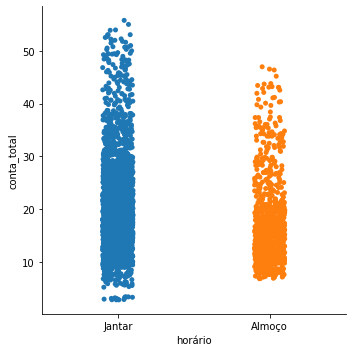

In [46]:
sns.catplot(x='horário', y='conta_total', data=dft)

aparentementme o valor da conta no jantar é maior que no almoço

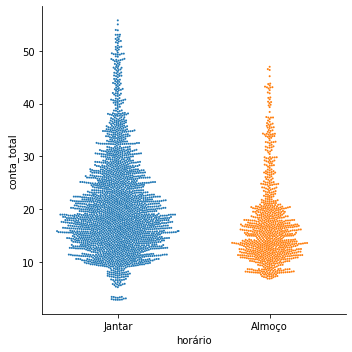

In [50]:
sns.catplot(x='horário', y='conta_total', kind='swarm', s=2, data=dft)

esse tipo dá uma espalhada

<AxesSubplot:xlabel='horário', ylabel='conta_total'>

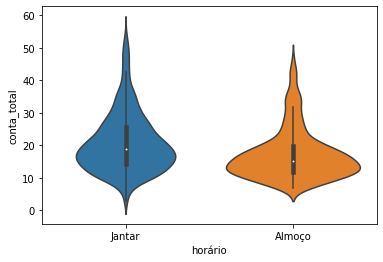

In [51]:
sns.violinplot(x='horário', y='conta_total', data=dft)

<AxesSubplot:xlabel='horário', ylabel='conta_total'>

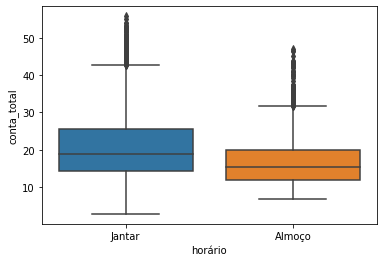

In [49]:
sns.boxplot(x='horário', y='conta_total', data=dft)

### Queries:

In [52]:
almoço = dft.query("horário == 'Almoço'")['conta_total']
almoço
#query dos itens horário == almoço

77      27.200000
78      22.760000
79      17.290000
80      19.440000
81      16.660000
          ...    
3394     8.057385
3395    16.753736
3396    13.334323
3397    15.724707
3398    10.730000
Name: conta_total, Length: 952, dtype: float64

In [53]:
jantar = dft.query("horário == 'Jantar'")['conta_total']
jantar
#query dos itens horário == jantar

0       16.990000
1       10.340000
2       21.010000
3       23.680000
4       24.590000
          ...    
3411    26.330845
3412    25.531567
3413    21.547132
3414    18.966233
3415    18.079740
Name: conta_total, Length: 2464, dtype: float64

#### Gráficos das queries:

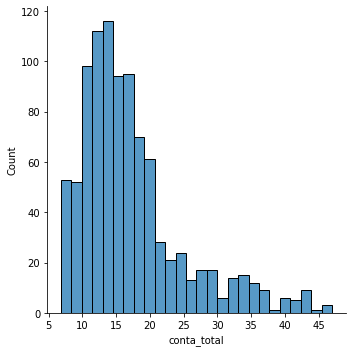

In [54]:
sns.displot(almoço)

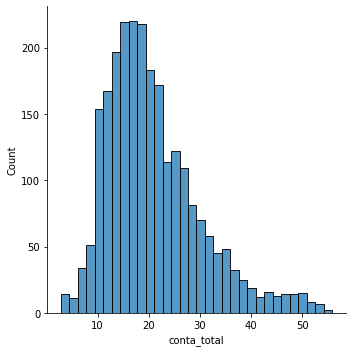

In [55]:
sns.displot(jantar)

## Testes de hipótese

### Teste de hipótese 1: horário

In [56]:
dft.groupby('horário').mean().round(2)[['conta_total', 'gorjeta', 'porcentagem']]
# retorna a média da conta, gorjeta e porcentagem dos grupos (groupby) Almoço e Jantar

,conta_total,gorjeta,porcentagem
horário,,,
Almoço,17.21,2.53,0.16
Jantar,20.83,2.78,0.15


Teste de hipótese: verificar se há diferença entre o valor da conta no jantar e almoço

Hipótese nula: a distribuição do valor da conta é igual no jantar e no almoço

Hipótese alt: a distribuição do valor da conta NÃO é igual no jantar e no almoço

In [57]:
rs_jantar_almoço = ranksums(jantar, almoço)[1]
print(f'O pvalue é {rs_jantar_almoço}')

O pvalue é 5.169201062207143e-34


pvalue = 5,16, o que significa que pvalue > 0,05, ou seja, NÃO podemos aceitar a H alt

### Teste de hipótese 2: porcentagem do horário

Teste de hipótese: verificar se há diferença entre a porcentagem da gorjeta no jantar e almoço

Hipótese nula: a distribuição da taxa da gorjeta é igual no jantar e no almoço

Hipótese alt: a distribuição da taxa da gorjeta NÃO é igual no jantar e no almoço

#### Queries:

In [58]:
porcentagem_almoço = dft.query("horário == 'Almoço'")['porcentagem']

In [59]:
porcentagem_jantar = dft.query("horário == 'Jantar'")['porcentagem']

In [60]:
rs_pcent_jantar_almoço = ranksums(porcentagem_almoço, porcentagem_jantar)[1]
print(f'O pvalue é {rs_pcent_jantar_almoço}')

O pvalue é 1.3785725618355523e-11


pvalue = 1,37, o que significa que pvalue > 0,05, ou seja, NÃO podemos aceitar a H alt